In [136]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [137]:
data=pd.read_csv('amazon_alexa.tsv',delimiter = '\t', quoting = 3)

In [138]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [139]:
sampledata=data[5:10]
sampledata

,rating,date,variation,verified_reviews,feedback
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1


In [140]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

So we Don't have any null values.Great!

Text(0.5, 1.0, 'Number of Unique Values of each Feature ')

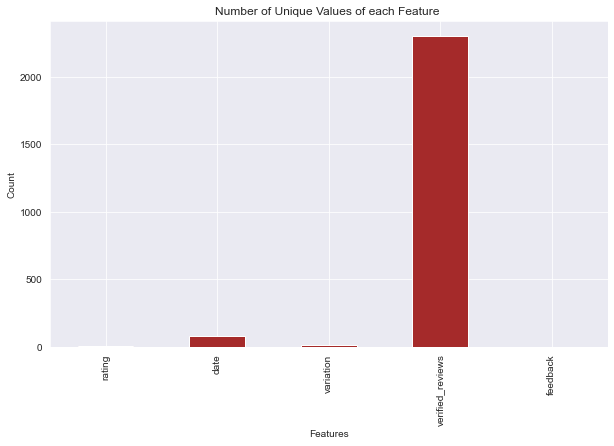

In [141]:
#Number of unique values of each column
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
data.nunique().plot(kind='bar', figsize=(10,6), color='brown')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Number of Unique Values of each Feature ')

C:\Sharmi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

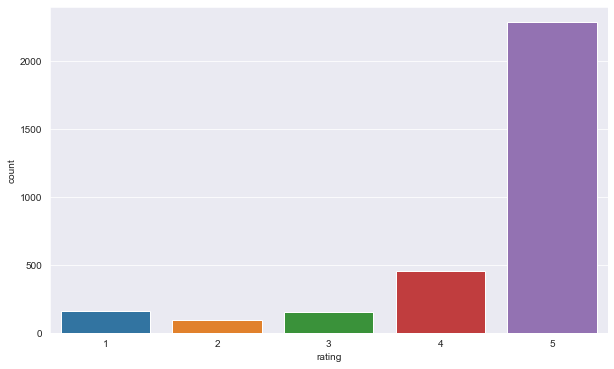

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(data['rating'])

Five rating Customers are more

Text(0, 0.5, 'Count')

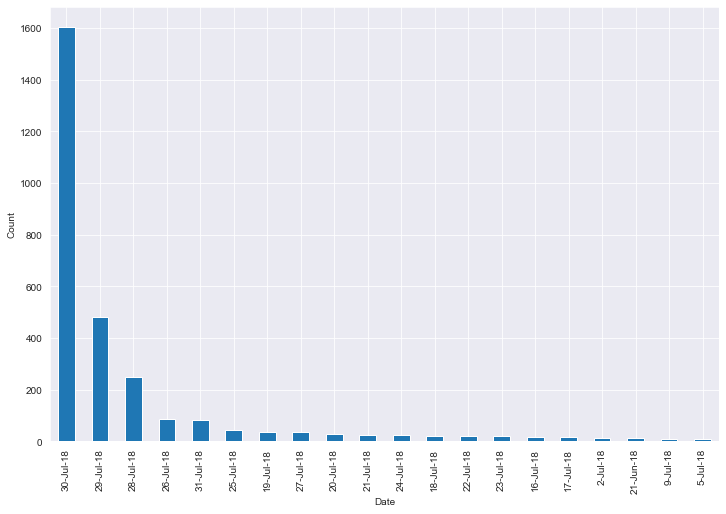

In [143]:
data['date'].value_counts()[:20].plot(kind='bar',figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Count')

Customer written reviews are more on 30 july'18



C:\Sharmi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

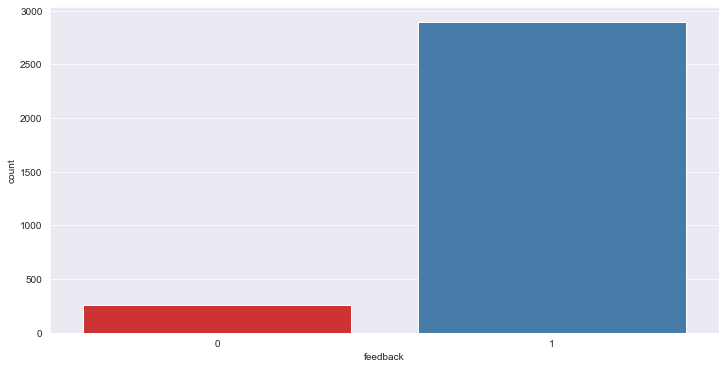

In [144]:
plt.figure(figsize=(12,6))
sns.countplot(data['feedback'], palette='Set1')

In [145]:
positive_feedbacks=data[data['feedback']==1]['verified_reviews']
negative_feedbacks=data[data['feedback']==0]['verified_reviews']

Text(0.5, 1.0, 'Positive Feedback Reviews')

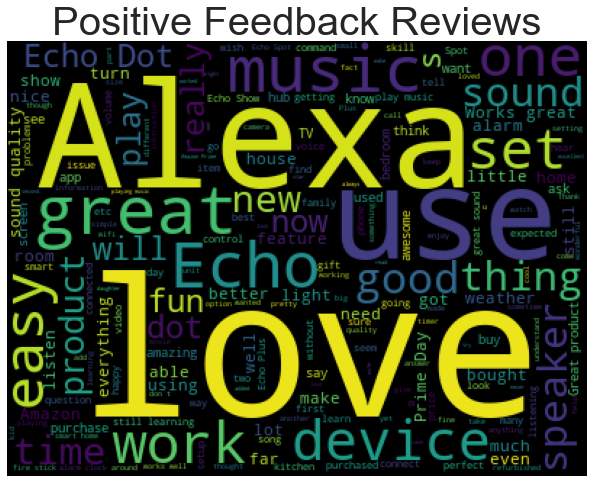

In [146]:
#Word Cloud for positive feedback review
from wordcloud import WordCloud
plt.figure(figsize=(14,8))
wordcloud1=WordCloud(width=400,height=300, contour_color='black').generate(' '.join(positive_feedbacks))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Positive Feedback Reviews',fontsize=40)

Text(0.5, 1.0, 'Negative Feedback Reviews')

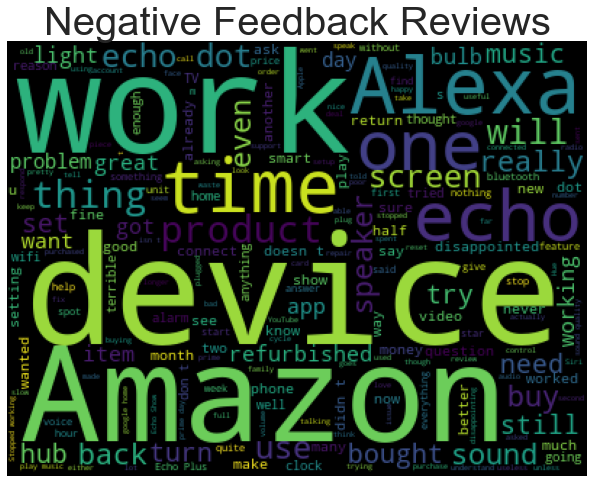

In [147]:
#Word Cloud for positive feedback reviews
from wordcloud import WordCloud
plt.figure(figsize=(14,8))
wordcloud1=WordCloud(width=400,height=300, contour_color='black').generate(' '.join(negative_feedbacks))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Negative Feedback Reviews',fontsize=40)


In [148]:
##Lets Import the required lib for our analysis
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [149]:
##Data Preprocessing
import nltk
from nltk.tokenize import word_tokenize
sample_lines_tokenized = [word_tokenize(data) for data in sampledata]
sample_lines_tokenized


[['rating'], ['date'], ['variation'], ['verified_reviews'], ['feedback']]

In [150]:
#Data preprocessing
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(0,3150):
    review=re.sub('[^a-zA-Z]',' ',data['verified_reviews'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [151]:
#Creating a Bag of Words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(corpus).toarray()
y=data.iloc[:,4].values


In [152]:
#Splitting the data into train and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)



In [153]:
#Fitting the model(In my case I am using NaiveBayes)
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [154]:
##Predicting the values

y_pred=classifier.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Confusion Matrix:\t \n',cm)
print('Accuracy: ', accuracy)
print(cr)


Confusion Matrix:	 
 [[  0  86]
 [  1 963]]
Accuracy:  0.9171428571428571
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.92      1.00      0.96       964

    accuracy                           0.92      1050
   macro avg       0.46      0.50      0.48      1050
weighted avg       0.84      0.92      0.88      1050



In [156]:

##Lets check using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

##Predicting the values

y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Confusion Matrix:\t \n',cm)
print('Accuracy: ', accuracy)
print(cr)


Confusion Matrix:	 
 [[ 15  71]
 [  0 964]]
Accuracy:  0.9323809523809524
              precision    recall  f1-score   support

           0       1.00      0.17      0.30        86
           1       0.93      1.00      0.96       964

    accuracy                           0.93      1050
   macro avg       0.97      0.59      0.63      1050
weighted avg       0.94      0.93      0.91      1050



In [157]:
#fitting model(KNN)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#predicting the values
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Confusion Matrix:\t \n',cm)
print('Accuracy: ', accuracy)
print(cr)


Confusion Matrix:	 
 [[  1  85]
 [  0 964]]
Accuracy:  0.919047619047619
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        86
           1       0.92      1.00      0.96       964

    accuracy                           0.92      1050
   macro avg       0.96      0.51      0.49      1050
weighted avg       0.93      0.92      0.88      1050



In [158]:
#Train and evaluate using LogisticRegression
#fitting(logistic regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

#predicting the values
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Confusion Matrix:\t \n',cm)
print('Accuracy: ', accuracy)
print(cr)



Confusion Matrix:	 
 [[  0  86]
 [  0 964]]
Accuracy:  0.9180952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.92      1.00      0.96       964

    accuracy                           0.92      1050
   macro avg       0.46      0.50      0.48      1050
weighted avg       0.84      0.92      0.88      1050



C:\Sharmi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Sharmi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Sharmi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
